
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

** Q1)  Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. **




In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import grid_search
%matplotlib inline


C:\Users\Jushira Thelakkat\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jushira Thelakkat\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
#Read the four datasets required
X1 = pd.read_csv('X1.csv',header=None)
X2 = pd.read_csv('X2.csv',header=None)
y1 = pd.read_csv('y1.csv',header=None)
y2 = pd.read_csv('y2.csv',header=None)

#train-test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1,test_size = 0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2,y2,test_size = 0.33, random_state=42)

In [7]:
X_train_2[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1522,2.300477,0.363770,0.144339,-0.558788,1.707447,-4.474695,1.839600,2.459295,3.828094,1.549987,0.252517,-1.777784,0.873365,-0.883064,0.902041,-0.078877,-2.489599,0.768784,3.327456,0.728037
835,-0.109199,0.212967,0.549064,-1.241836,1.960115,0.657332,-2.455211,-2.225724,-4.990068,0.050653,-2.349657,1.515976,1.055816,-0.752454,-0.200222,2.208993,2.978494,-0.895843,-4.034914,0.737746
358,1.369038,0.478174,0.328843,-0.788425,1.909545,-2.544886,-1.894744,1.084245,-1.244259,0.849203,-1.603663,0.508336,1.294782,0.142815,0.103085,1.419244,-2.938557,-0.556318,1.912863,1.791105
138,-1.021278,-1.482523,-1.084386,1.627551,0.837333,-0.127461,-1.288318,-1.537706,1.955051,2.121180,-0.869797,-2.409449,-0.497299,-0.236416,1.923061,4.109815,-0.789706,-0.850928,-1.740679,-0.376976
299,1.617604,-1.390829,0.475023,-1.791082,-0.632696,2.367605,1.146786,0.600876,-0.480133,1.930179,-4.115812,1.206437,0.865262,0.652520,-0.017445,-0.558426,2.747832,1.038659,4.870268,-1.560821


In [4]:
X_test_1.shape

(3300, 30)

** Q2) Build a classifier using [Random Forest] (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.**

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times) 

#### RANDOM FOREST

In [5]:
# Find best parameters (X1,y1)

rf = RandomForestClassifier(n_jobs=-1, oob_score = True)

C = {'n_estimators':[100,200,300],'max_features': ['sqrt','log2',None]}

clf = grid_search.GridSearchCV(estimator=rf, param_grid=C, cv=3,n_jobs=-1,scoring='accuracy')

# Train the model
clf.fit(X_train_1,y_train_1[0].values)

# Best value of C
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)

Best C: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Mean error rate: 0.0913432835821


C:\Users\Jushira Thelakkat\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training time: 6.182 s
Prediction time: 2.36 s
Confusion Matrix
[[1452  229]
 [ 157 1462]]
Mean error rate is 11.697 %


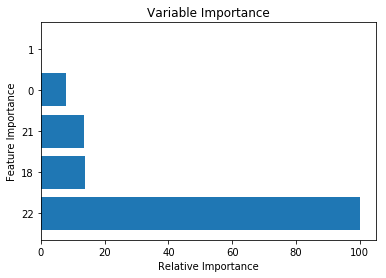

In [6]:
########### DATASET 1 ###############

t0=time()
model = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = -1,random_state =50,max_features = None, min_samples_leaf = 50)
model.fit(X_train_1,y_train_1)
print "Training time:", round(time()-t0, 3), "s"

# Prediction
t1=time()
rf_training = model.predict(X_train_1)
rf_test = model.predict(X_test_1)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix = confusion_matrix(y_test_1,rf_test)
print ConMatrix
print "Mean error rate is %.3f" %((1-(accuracy_score(y_test_1, rf_test)))*100), "%"
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance')                                           

In [10]:
# Find best parameters (X2,y2)

rf_2 = RandomForestClassifier(n_jobs=-1, oob_score = True)

C = {'n_estimators':[100,200,300,400],
    'max_features': ['sqrt','log2',None]}

clf = grid_search.GridSearchCV(estimator=rf_2, param_grid=C, cv=3,n_jobs=-1,scoring='accuracy')

# Training
clf.fit(X_train_2,y_train_2[0].values)

# Best value of C
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)

Best C: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Mean error rate: 0.0737313432836


Training time: 1.044 s
Prediction time: 0.767 s
Confusion Matrix
[[745 105]
 [ 82 718]]
Mean error rate is 11.333 %


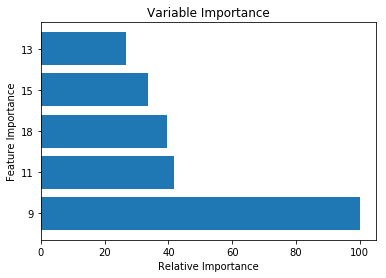

In [11]:
########## DATASET 2 ##################

t0=time()
model = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
model.fit(X_train_2,y_train_2)
print "Training time:", round(time()-t0, 3), "s"

# Prediction
t1=time()
rf_2_training = model.predict(X_train_2)
rf_2_test = model.predict(X_test_2)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix = confusion_matrix(y_test_2,rf_2_test)
print ConMatrix
print "Mean error rate is %.3f" %((1-(accuracy_score(y_test_2, rf_2_test)))*100), "%"

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance') 

#### GRADIENT BOOSTING DECISION TREE

In [12]:
# Find best parameters - (X1,y1)

gb_1 = GradientBoostingClassifier()

C = {'n_estimators':[500,700,900,1200],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=gb_1, param_grid=C,n_jobs=-1,cv=3,scoring='accuracy')

#Training
clf.fit(X_train_1,y_train_1[0].values)

#Best value of C 
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)

Best C: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=900, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Mean error rate: 0.101641791045


Training time: 12.153 s
Prediction time: 0.104 s
Confusion Matrix
[[1501  180]
 [ 142 1477]]
Mean error rate is 9.758 %


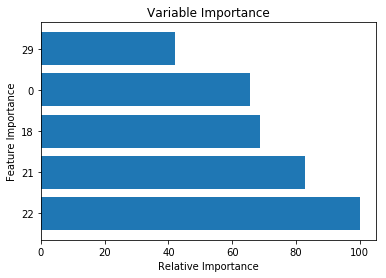

In [13]:
############# DATASET 1 #######################

t0=time()
model = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=900, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
model.fit(X_train_1,y_train_1)
print "Training time:", round(time()-t0, 3), "s"

# Prediction
t1=time()
gbc_1_training = model.predict(X_train_1)
gbc_1_test = model.predict(X_test_1)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix = confusion_matrix(y_test_1,gbc_1_test)
print ConMatrix
print "Mean error rate is %.3f" %((1-(accuracy_score(y_test_1, gbc_1_test)))*100), "%"

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance')

In [14]:
# Find best parameters - (X2,y2)

gb_2 = GradientBoostingClassifier()

C = {'n_estimators':[500,700,900,1200],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=gb_2, param_grid=C,n_jobs=-1,cv=3,scoring='accuracy')

#Train the model
clf.fit(X_train_2,y_train_2[0].values)

#Best value of C 
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)

Best C: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=700, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Mean error rate: 0.0776119402985


In [1]:
######## DATASET 2 ###########

t0=time()
model = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=1200, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
model.fit(X_train_2,y_train_2)
print "Training time:", round(time()-t0, 3), "s"

# Prediction
t1=time()
gb_2_training = model.predict(X_train_2)
gb_2_test = model.predict(X_test_2)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix= confusion_matrix(y_test_2,gb_2_test)
print ConMatrix
print "Mean error rate is %.3f" %((1-(accuracy_score(y_test_2, gb_2_test)))*100), "%"

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance')                                             

NameError: name 'time' is not defined

#### XGBOOST

In [16]:
# Find best parameters - (X1,y1)

xgb_1 = XGBClassifier()

C = {'n_estimators':[700,900,1200,1500],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=xgb_1, param_grid=C,n_jobs=-1,cv=3,scoring='accuracy')

#Train the model
clf.fit(X_train_1,y_train_1[0].values)

#Best value of C 
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)



Best C: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Mean error rate: 0.0973134328358


Training time: 2.375 s
Prediction time: 0.1 s
Confusion Matrix
[[1522  159]
 [ 125 1494]]
Mean error rate of the model is 8.606 %


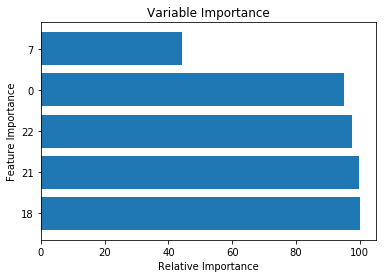

In [20]:
########### DATASET 1 #################

t0=time()
model = XGBClassifier(learning_rate =0.1,n_estimators=700,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model.fit(X_train_1,y_train_1)
print "Training time:", round(time()-t0, 3), "s"

#Predicting
t1=time()
xgb_1_training = model.predict(X_train_1)
xgb_1_test = model.predict(X_test_1)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix = confusion_matrix(y_test_1,xgb_1_test)
print ConMatrix

print "Mean error rate of the model is %.3f" %((1-(accuracy_score(y_test_1, xgb_1_test)))*100), "%"

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance') 



In [21]:
# Find best parameters - (X2,y2)

xgb_2 = XGBClassifier()

C = {'n_estimators':[700,900,1200,1500],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=xgb_2, param_grid=C,n_jobs=-1,cv=3,scoring='accuracy')

#Train the model
clf.fit(X_train_2,y_train_2[0].values)

#Best value of C 
print 'Best C:',clf.best_estimator_
print 'Mean error rate:', (1-clf.best_score_)



Best C: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=900, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Mean error rate: 0.0689552238806


Training time: 1.292 s
Prediction time: 0.069 s
Confusion Matrix
[[808  42]
 [ 31 769]]
Mean error rate of the model is 4.424 %


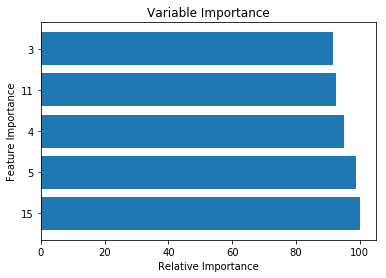

In [22]:
############ DATASET 2 ########################3

t0=time()
model = XGBClassifier(learning_rate =0.1,n_estimators=900,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
model.fit(X_train_2,y_train_2)
print "Training time:", round(time()-t0, 3), "s"

#Prediction
t1=time()
xgb_2_training = model.predict(X_train_2)
xgb_2_test = model.predict(X_test_2)
print "Prediction time:", round(time()-t1, 3), "s"

print "Confusion Matrix"
ConMatrix = confusion_matrix(y_test_2,xgb_2_test)
print ConMatrix
print "Mean error rate of the model is %.3f" %((1-(accuracy_score(y_test_2, xgb_2_test)))*100), "%"

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:5], feature_importance[sorted_idx][:5], align='center')
plt.yticks(pos[:5], sorted_idx[:5])
plt.xlabel('Relative Importance')
plt.ylabel('Feature Importance')
plt.title('Variable Importance') 



**Q3) Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results? **

When we compare random forest, gradient boosting and XGBoost - XGBoost performed better.
The Mean Error rate is higher for models on first dataset than for models on second dataset.
While comparing the number of trees built for both the datasets, we can see that the model working on the second dataset does not overfit as fast as the model on first dataset.

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

In [46]:
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool,ResetTool, Jitter, WheelZoomTool
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show
 
data1 = pd.read_csv("nbasalariesfull.csv")
data1["logsalary"] = data1.SALARY.apply(np.log)
 
 
source1 = ColumnDataSource(data=data1)
hover1=HoverTool(tooltips=[
        ( "Player", "@Player" ),
        ( 'Team',  '@Tm' ), # use @{ } for field names with spaces
        ( 'Position', '@Pos'),
        ("Salary", '@SALARY'),
        ])
p1 = figure(title = "Log Salary Plot Vs Age", tools=[hover1,BoxZoomTool(), ResetTool(),  WheelZoomTool()])
p1.xaxis.axis_label = 'Age'
p1.yaxis.axis_label = 'LogSalary'
 
colormap = {'PF': 'red', 'PG': 'green', 'SF': 'blue', 'SG':'yellow', 'C': 'pink', 'SG-SF':'orange', "PF-C": 'brown' }
colors = [colormap[x] for x in data1['Pos']]
p1.circle(x=jitter('Age', width=0.6, range=p1.x_range), y='logsalary', color=colors, source=source1, fill_alpha=0.2, size=10)
tab1 = Panel(child=p1, title=title)
 
 
p2 = figure(title="Log Salary Plot Vs Points/Game", tools=[hover, BoxZoomTool(), ResetTool(),  WheelZoomTool()])
p2.circle(x='PSG', y='logsalary', color=colors, source=source1, fill_alpha=0.2, size=10)
tab2 = Panel(child=p2, title=title)
tabs = Tabs(tabs=[tab1,tab2])
show(tabs)

ImportError: No module named transform

In [23]:
data[:5]

,Player,Tm,Pos,Age,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PSG,SALARY,logsalary
0,Stephen Curry,GSW,PG,27.0,79.0,79.0,34.2,10.2,20.2,0.504,...,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,11370786,16.246558
1,James Harden,HOU,SG,26.0,82.0,82.0,38.1,8.7,19.7,0.439,...,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,15756438,16.572760
2,Kevin Durant,OKC,SF,27.0,72.0,72.0,35.8,9.7,19.2,0.505,...,7.6,8.2,5.0,1.0,1.2,3.5,1.9,28.2,20158622,16.819143
3,DeMarcus Cousins,SAC,C,25.0,65.0,65.0,34.6,9.2,20.5,0.451,...,9.1,11.5,3.3,1.6,1.4,3.8,3.6,26.9,15851950,16.578803
4,LeBron James,CLE,SF,31.0,76.0,76.0,35.6,9.7,18.6,0.520,...,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,22970500,16.949721


In [24]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, WheelZoomTool, ResetTool
output_notebook()

def create_tab(x, y, data, xlab, title, colors):

    source = ColumnDataSource(data=dict(desc=data['Player'], team=data['Tm'], pos=data['Pos'], sal=data['SALARY'], xvar=x))

    hover = HoverTool(tooltips=[("Player", "@desc"), ("Team", "@team"), ("Position", "@pos"), 
                                ("Salary", "@sal"), (xlab,"@xvar") ])

    p = figure(plot_width=900, plot_height=600, tools = [hover, WheelZoomTool(), ResetTool()])
    
    if (xlab =='Age'):
        p.circle(x={'field': 'xvar', 'transform': Jitter(width=1)}, y=y, size=5, 
                 color=colors, legend='pos', fill_alpha=0.2, source = source)
    
    else:
        p.circle(x, y=y, size=5, color=colors, legend='pos', fill_alpha=0.2, source = source)    
    
    p.xaxis.axis_label = xlab
    p.yaxis.axis_label = "Log Salary"
    p.legend
    
    tab = Panel(child=p, title=title)

    return tab

Loading BokehJS ...

In [25]:
import warnings
warnings.filterwarnings('ignore')

colormap = {'PF': 'red', 'PG': 'green',  'SF': 'blue', 'SG': 'yellow', 'C': 'brown', 'PF-C': 'pink', 'SG-SF': 'purple'}
colors = [colormap[x] for x in data['Pos']]

tab1 = create_tab(data['PSG'],data['logsalary'],data,"PSG","Salary vs Points per Game", colors)
tab2 = create_tab(data['Age'],data['logsalary'],data,"Age","Salary vs Age", colors)
tabs = Tabs(tabs=[tab1,tab2])

show(tabs)

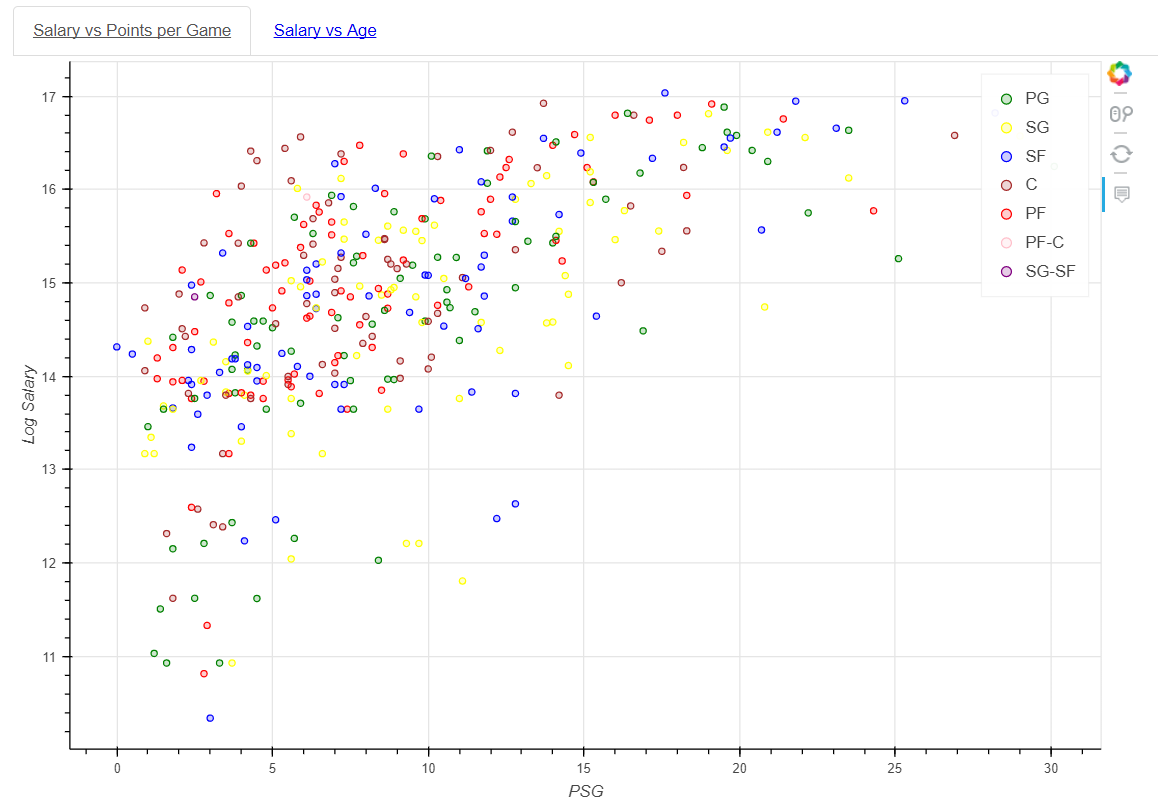

In [26]:
from IPython.display import Image
Image(filename='Bokeh_1.png')

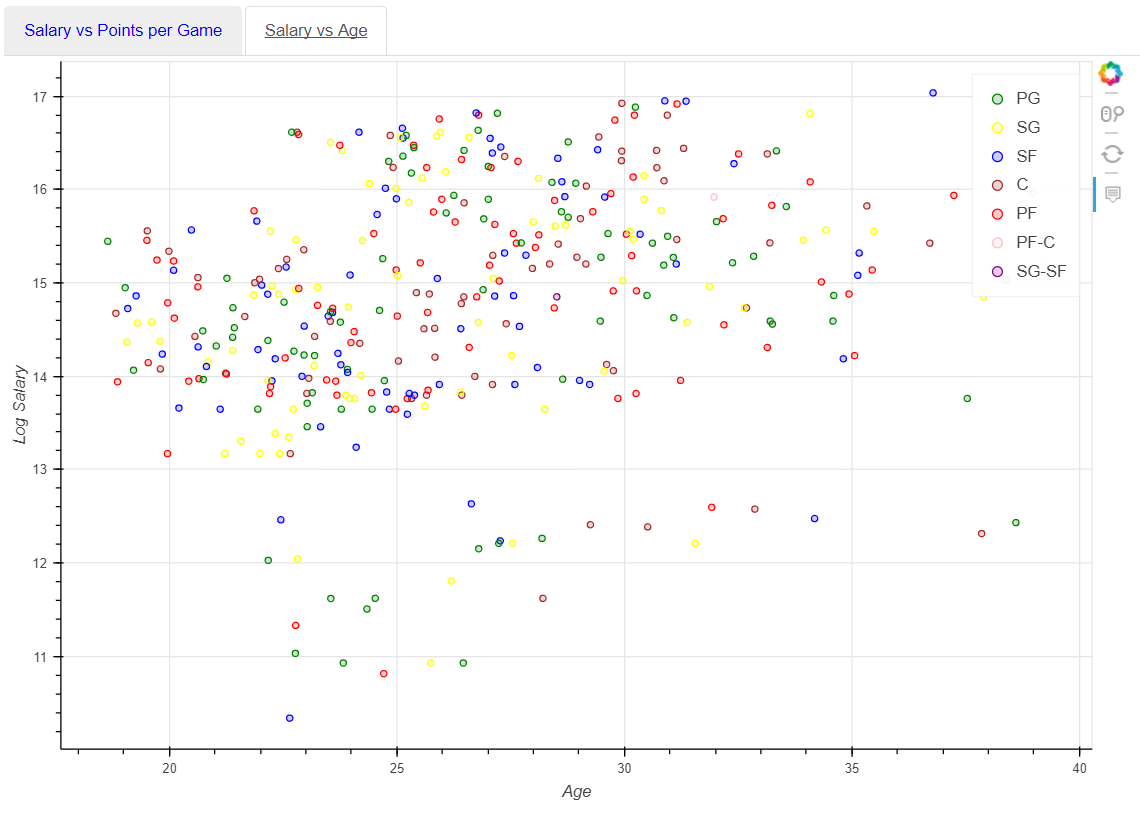

In [27]:
from IPython.display import Image
Image(filename='Bokeh_2.png')

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('diabetes_train-log.csv')
data_test = pd.read_csv('diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

### (a) Linear SVM

In [31]:
#linear SVM model after attributing a list of values to slack penalty
from sklearn.metrics import accuracy_score

#Build the SVM model
C = {'C':[0.01, 0.1,0.5, 1,2,3,4,5,6,7,8,9,10,100]}
svm_linear = SVC(kernel = 'linear')
clf = grid_search.GridSearchCV(estimator=svm_linear, param_grid=C, cv=10,scoring='accuracy')

#Train the model
clf_train = clf.fit(xtrain,ytrain)

#Predict
clf_pred_train = clf.predict(xtrain)
clf_pred_test = clf.predict(xtest)

#Best value of C
print 'Best accuracy of the linear kernel model:', clf.best_score_ 
print 'Best value of C:',clf.best_estimator_.C
print "Training error rate: %.2f" %((1-(accuracy_score(ytrain, clf_pred_train)))*100)+ "%"
print "Test error rate: %.2f" %((1-(accuracy_score(ytest, clf_pred_test)))*100)+ "%"

Best accuracy of the linear kernel model: 0.72
Best value of C: 2
Training error rate: 25.00%
Test error rate: 20.45%


### (b) Radial Basis kernel

In [32]:
#Build the SVM model
C = {'C':[0.01, 0.1, 1, 5, 10 ,15,20,25,30,35,40,45,50,100]}
svm_radial = SVC(kernel = 'rbf')
clf = grid_search.GridSearchCV(estimator=svm_radial, param_grid=C, cv=10,scoring='accuracy')

#Train the model
clf_train = clf.fit(xtrain,ytrain)

#Predict
clf_pred_train = clf.predict(xtrain)
clf_pred_test = clf.predict(xtest)

#Best value of C
print 'Best accuracy of the radial kernel model:', clf.best_score_
print 'Best value of C:',clf.best_estimator_.C
print "Training error rate: %.2f" %((1-(accuracy_score(ytrain, clf_pred_train)))*100)+ "%"
print "Test error rate: %.2f" %((1-(accuracy_score(ytest, clf_pred_test)))*100)+ "%"

Best accuracy of the radial kernel model: 0.695
Best value of C: 15
Training error rate: 19.00%
Test error rate: 21.85%


### Comparision

Performed 10-fold cross validation to identify the best value of slack penalty C: 
The linear kernel SVM has a lower value of slack penalty of 2, while the radial basis kernel has a higher value of 15. 

The mean training error rate for the linear kernel is 25% and the mean test error rate is 20.5% while for the radial basis kernel the train error is 19% while the test error is 22%

Higher the slack penalty, more misclassification is allowed, the classifier hugs the data leading to overfitting in the case of radial kernel. Applying this logic to our results, we conclude that the linear kernel is less prone to overfitting the data and provides better accuracy.
The radial kernel overfits the data incurring a higher slack penalty and resulting in a higher error rate compared to the linear kernel SVM. 